In [1]:
import pandas as pd
df = pd.read_csv("delhi_aqi_sample.csv")
df.head()

,Date,City,PM2.5,PM10,NO2,CO,SO2,AQI
0,2021-01-01,Delhi,210,280,52,1.20,5,302
1,2021-01-02,Delhi,198,260,49,1.10,6,280
2,2021-01-03,Delhi,175,240,47,1.00,4,260
3,2021-01-04,Delhi,190,255,50,1.15,5,270
4,2021-01-05,Delhi,220,290,55,1.30,7,310


In [6]:
# -----------------------------------
# 3. Basic Info
# -----------------------------------
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe())


Shape of dataset: (60, 8)

Column Names: ['Date', 'City', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'AQI']

Data Types:
Date     datetime64[ns]
City             object
PM2.5             int64
PM10              int64
NO2               int64
CO              float64
SO2               int64
AQI               int64
dtype: object

Missing Values:
Date     0
City     0
PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
AQI      0
dtype: int64

Descriptive Statistics:
                      Date       PM2.5        PM10        NO2         CO  \
count                   60   60.000000   60.000000  60.000000  60.000000   
mean   2021-01-30 12:00:00  190.100000  257.800000  48.900000   1.125000   
min    2021-01-01 00:00:00  165.000000  235.000000  44.000000   1.000000   
25%    2021-01-15 18:00:00  175.000000  245.000000  46.000000   1.050000   
50%    2021-01-30 12:00:00  185.000000  252.500000  48.500000   1.100000   
75%    2021-02-14 06:00:00  210.000000  275.000000  52.000000   1.200000   
max 

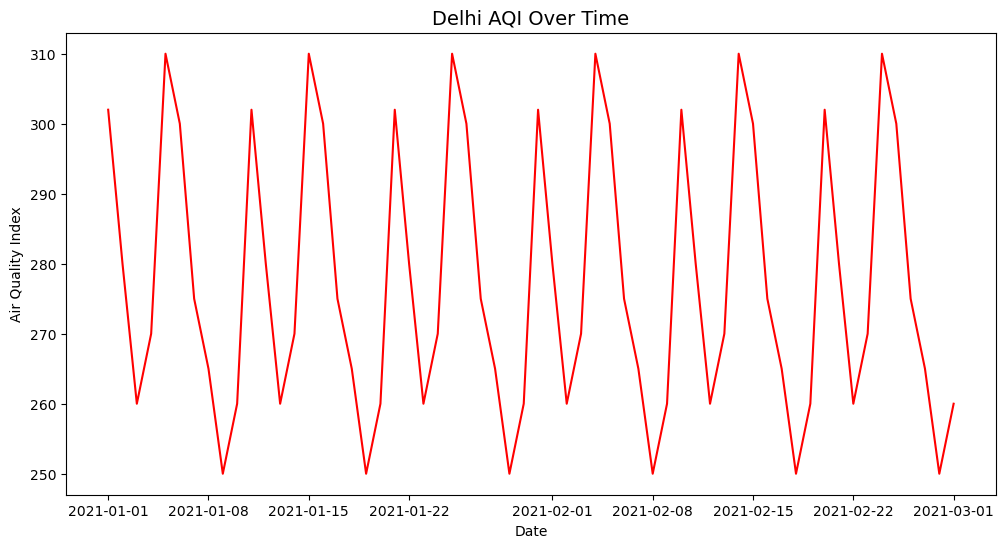

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="AQI", data=df, color="red")
plt.title("Delhi AQI Over Time", fontsize=14)
plt.ylabel("Air Quality Index")
plt.xlabel("Date")
plt.show()

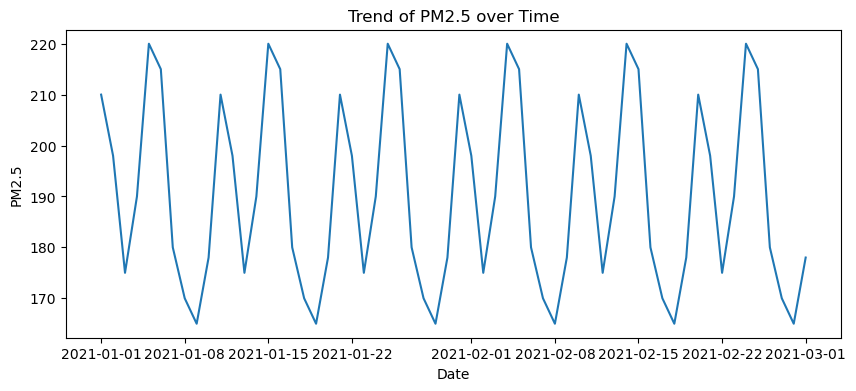

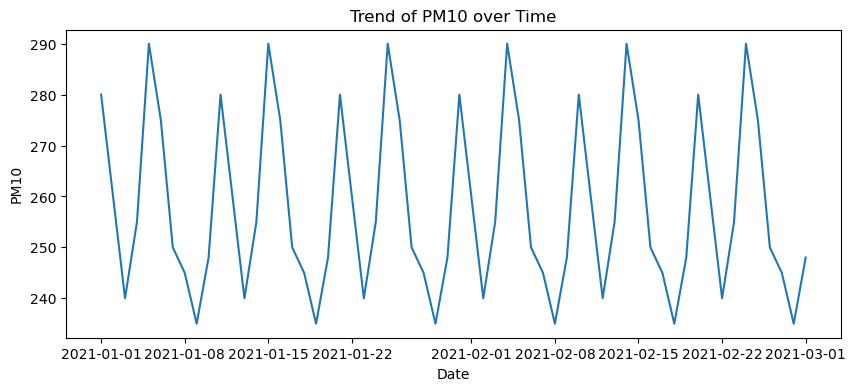

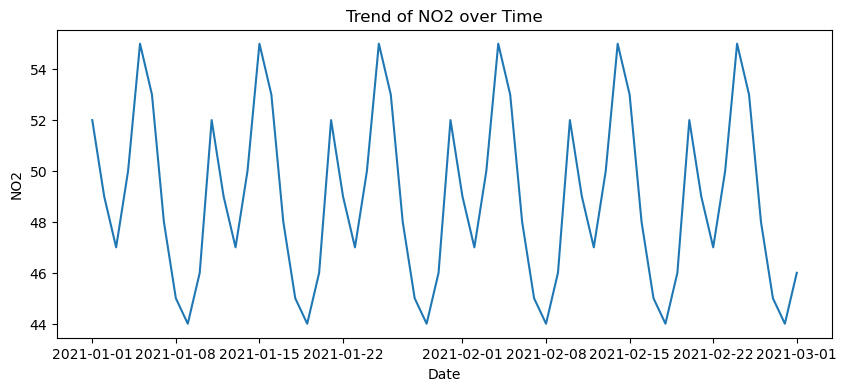

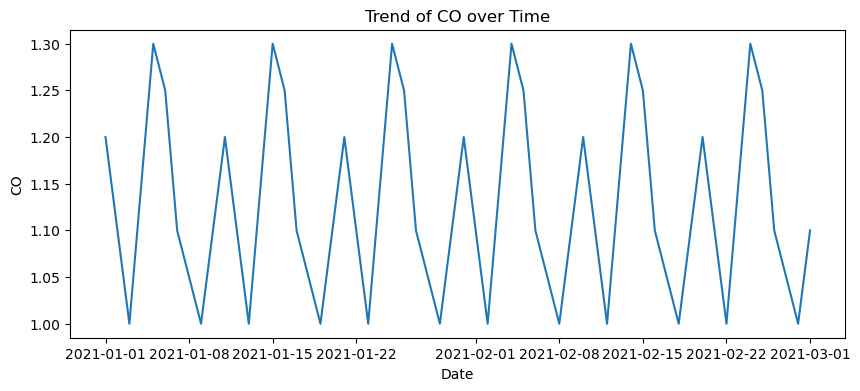

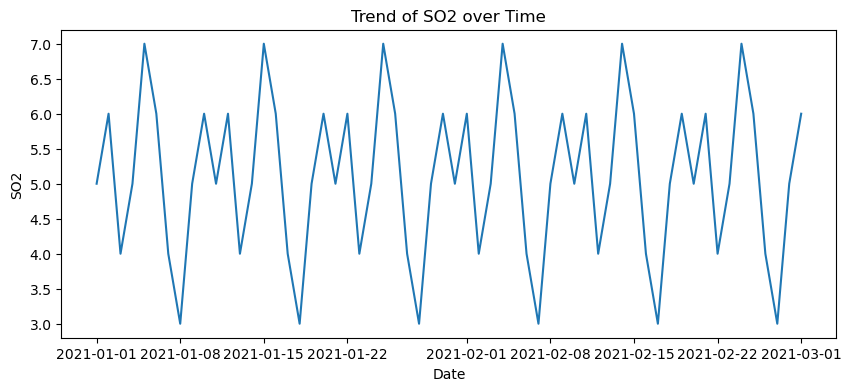

In [8]:
# -----------------------------------
# 5. Pollutant Trends
# -----------------------------------
pollutants = ["PM2.5","PM10","NO2","CO","SO2"]

for col in pollutants:
    plt.figure(figsize=(10,4))
    sns.lineplot(x="Date", y=col, data=df)
    plt.title(f"Trend of {col} over Time")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.show()


C:\Users\KOUSHITHA KETHINENI\AppData\Local\Temp\ipykernel_26196\2166403358.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y="AQI", data=df, palette="Set2")


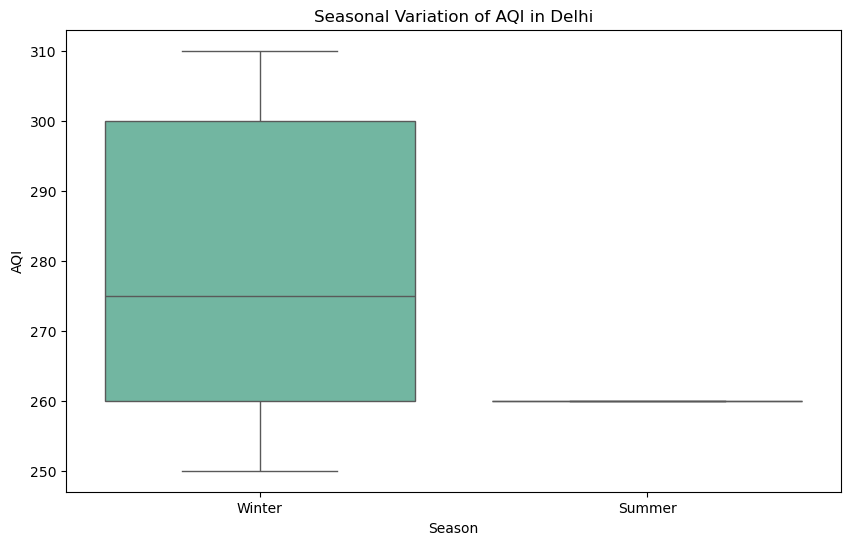

In [22]:
df['Month'] = df['Date'].dt.month
df['Season'] = df['Month'].map({
    12:'Winter',1:'Winter',2:'Winter',
    3:'Summer',4:'Summer',5:'Summer',
    6:'Monsoon',7:'Monsoon',8:'Monsoon',
    9:'Autumn',10:'Autumn',11:'Autumn'
})

plt.figure(figsize=(10,6))
sns.boxplot(x="Season", y="AQI", data=df, palette="Set2")
plt.title("Seasonal Variation of AQI in Delhi")
plt.show()

In [23]:

winter_aqi = df[df['Season']=='Winter']['AQI']
monsoon_aqi = df[df['Season']=='Monsoon']['AQI']

t_stat, p_val = stats.ttest_ind(winter_aqi, monsoon_aqi, nan_policy='omit')
print("T-Test: Winter vs Monsoon AQI")
print("t-statistic:", round(t_stat,3), " | p-value:", round(p_val,4))


T-Test: Winter vs Monsoon AQI
t-statistic: nan  | p-value: nan


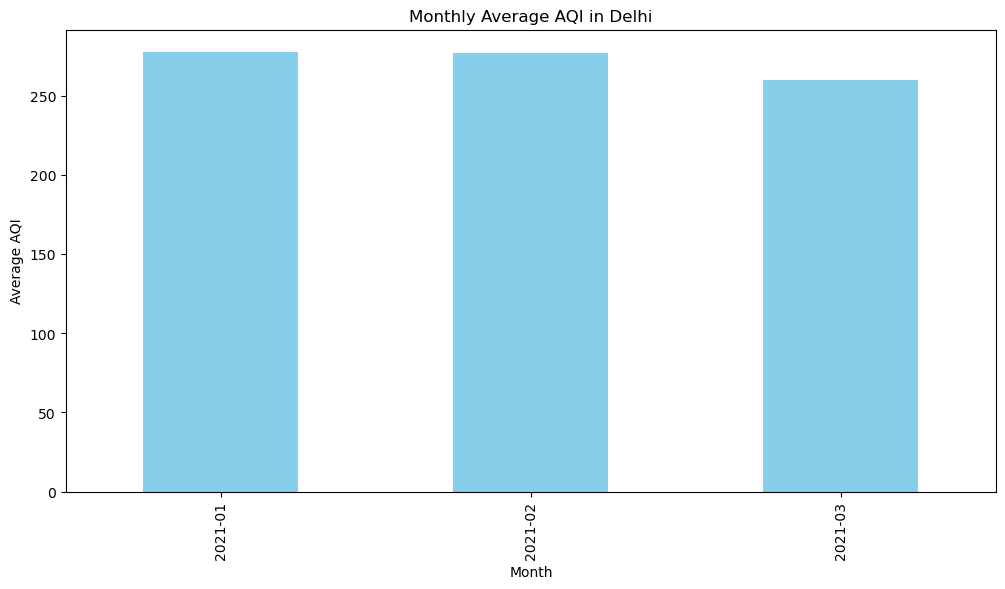

In [24]:

monthly_avg = df.groupby(df['Date'].dt.to_period("M"))['AQI'].mean()

plt.figure(figsize=(12,6))
monthly_avg.plot(kind="bar", color="skyblue")
plt.title("Monthly Average AQI in Delhi")
plt.ylabel("Average AQI")
plt.xlabel("Month")
plt.show()


C:\Users\KOUSHITHA KETHINENI\AppData\Local\Temp\ipykernel_26196\2746286768.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="AQI_Category", data=df, palette="coolwarm", order=["Good","Satisfactory","Moderate","Poor","Very Poor","Severe"])


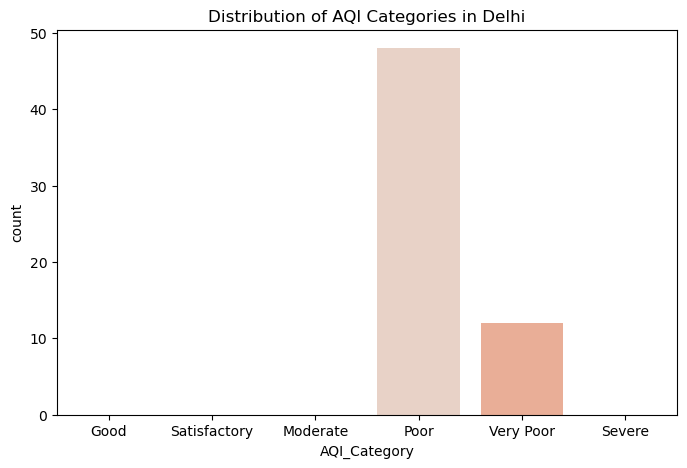

In [15]:
# AQI Category classification (based on CPCB standards)
def classify_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

df['AQI_Category'] = df['AQI'].apply(classify_aqi)

plt.figure(figsize=(8,5))
sns.countplot(x="AQI_Category", data=df, palette="coolwarm", order=["Good","Satisfactory","Moderate","Poor","Very Poor","Severe"])
plt.title("Distribution of AQI Categories in Delhi")
plt.show()


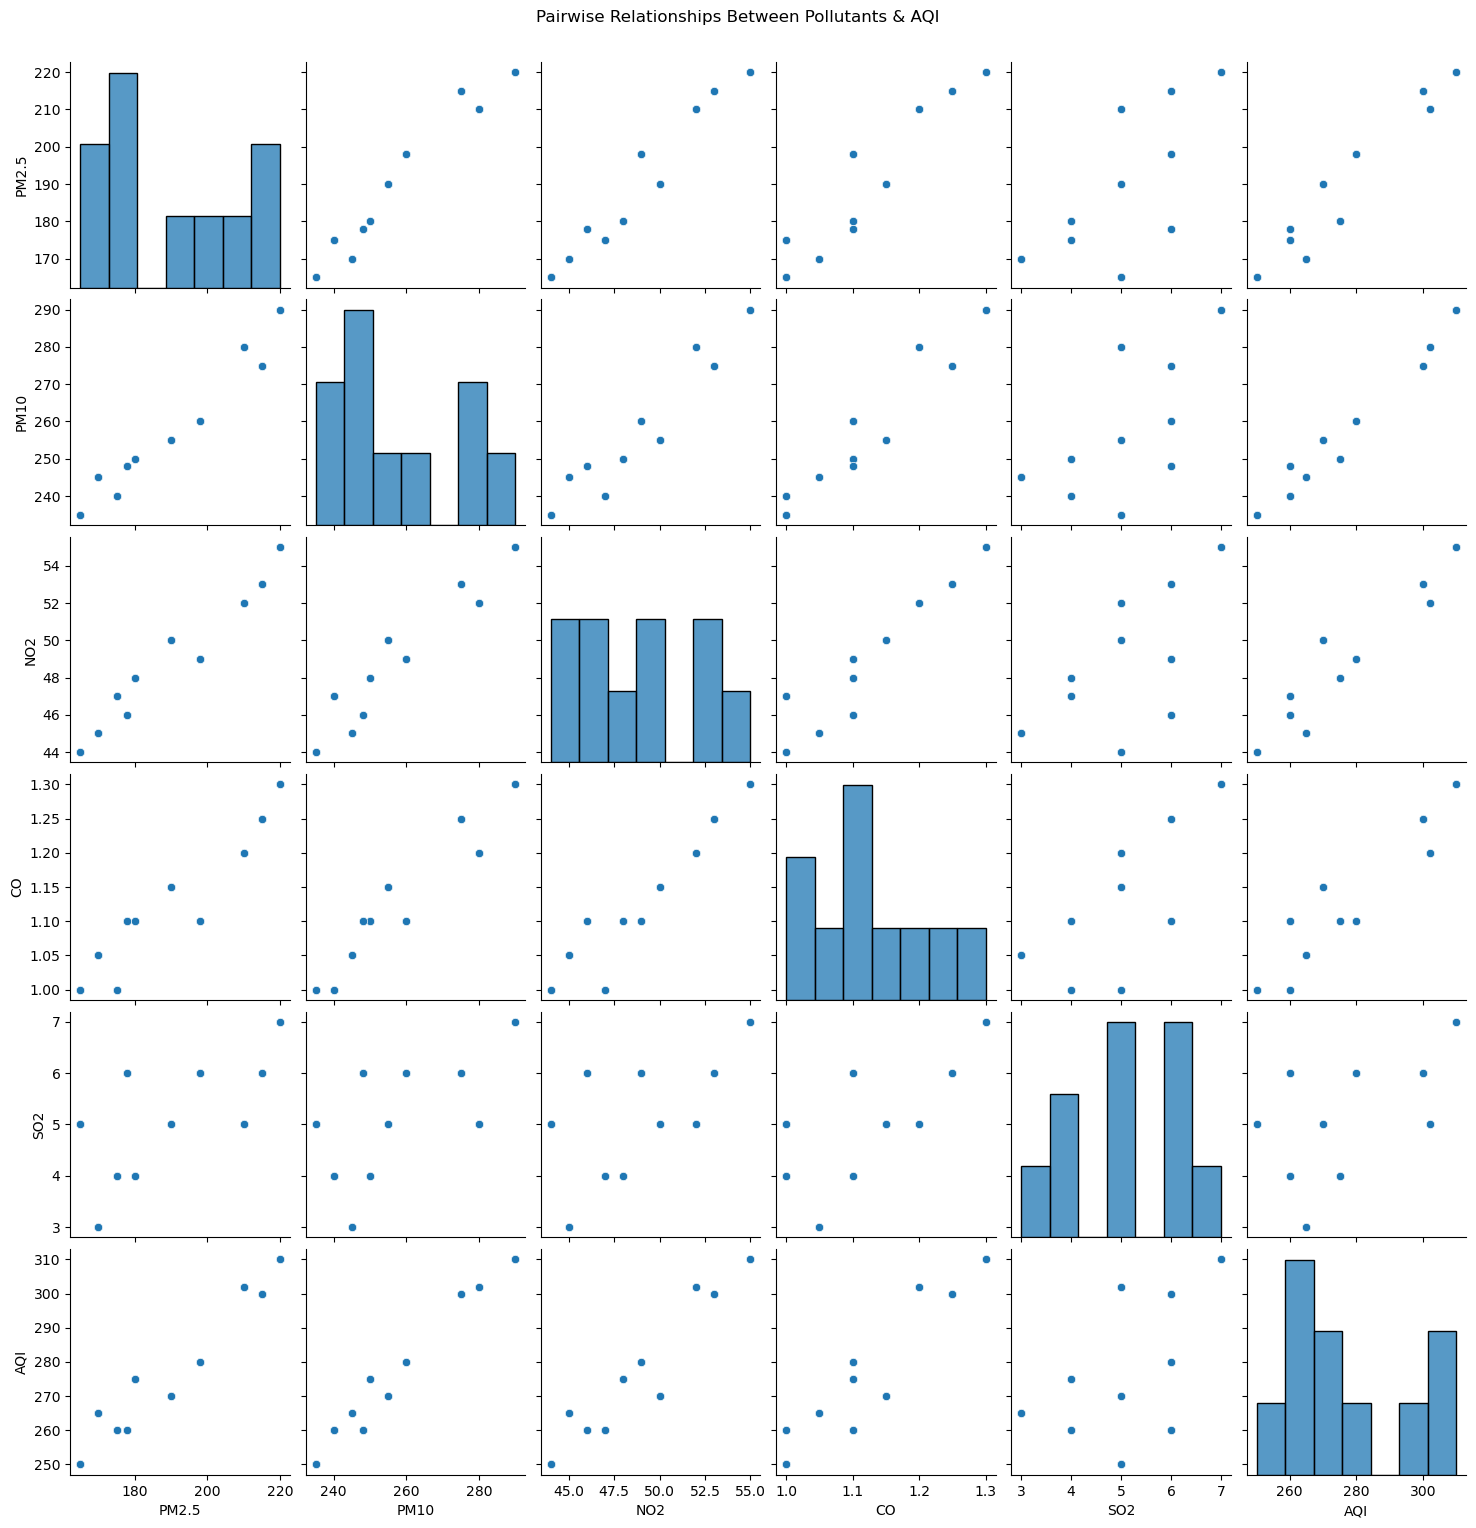

In [25]:
sns.pairplot(df[["PM2.5","PM10","NO2","CO","SO2","AQI"]])
plt.suptitle("Pairwise Relationships Between Pollutants & AQI", y=1.02)
plt.show()


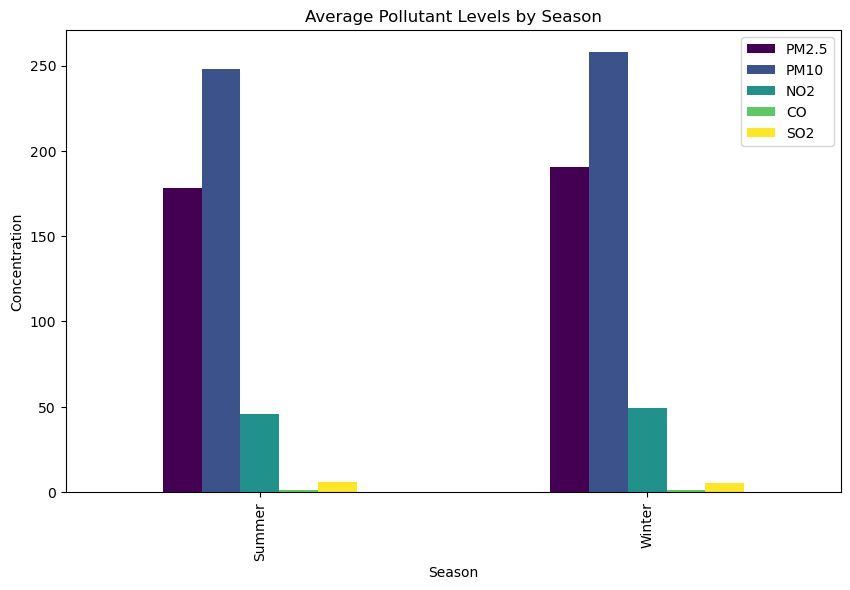

In [18]:
seasonal_means = df.groupby("Season")[["PM2.5","PM10","NO2","CO","SO2"]].mean()
seasonal_means.plot(kind="bar", figsize=(10,6), colormap="viridis")
plt.title("Average Pollutant Levels by Season")
plt.ylabel("Concentration")
plt.show()


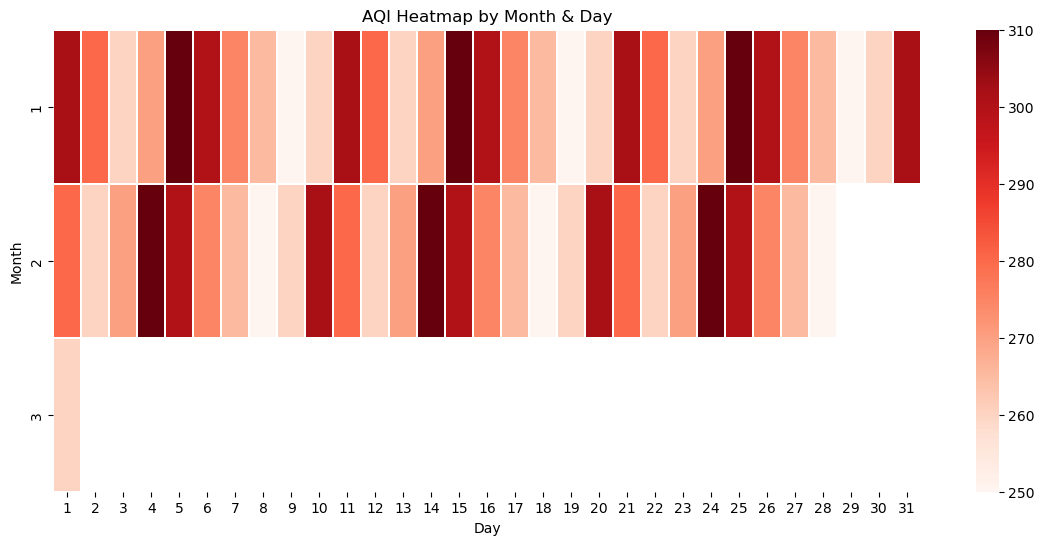

In [20]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

pivot = df.pivot_table(index="Month", columns="Day", values="AQI", aggfunc="mean")

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="Reds", linewidths=0.1)
plt.title("AQI Heatmap by Month & Day")
plt.show()


C:\Users\KOUSHITHA KETHINENI\AppData\Local\Temp\ipykernel_26196\2964398766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_days['Date'].dt.strftime("%Y-%m-%d"), y=worst_days['AQI'], palette="Reds_r")


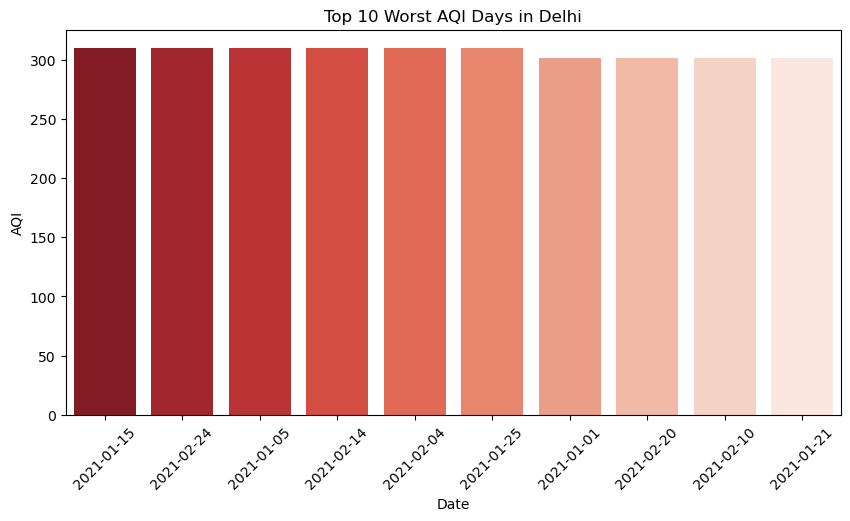

In [26]:
worst_days = df.sort_values("AQI", ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=worst_days['Date'].dt.strftime("%Y-%m-%d"), y=worst_days['AQI'], palette="Reds_r")
plt.xticks(rotation=45)
plt.title("Top 10 Worst AQI Days in Delhi")
plt.ylabel("AQI")
plt.show()


In [28]:
from sklearn.linear_model import LinearRegression

X = df[["PM2.5","PM10","NO2","CO","SO2"]]
y = df["AQI"]

model = LinearRegression()
model.fit(X, y)

print("R² Score:", model.score(X, y))
print("Coefficients:", dict(zip(X.columns, model.coef_)))


R² Score: 0.9845105050744075
Coefficients: {'PM2.5': 0.4377125108996513, 'PM10': 0.8427499122819494, 'NO2': -0.1835712961063848, 'CO': -5.381344670118613, 'SO2': -3.3526357547255325}


Correlation of Pollutants with AQI:

PM10     0.981890
PM2.5    0.962982
NO2      0.948093
CO       0.926420
SO2      0.535193
Day     -0.041877
Month   -0.067859
Name: AQI, dtype: float64


C:\Users\KOUSHITHA KETHINENI\AppData\Local\Temp\ipykernel_26196\3194452438.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.index, y=corr.values, palette="viridis")


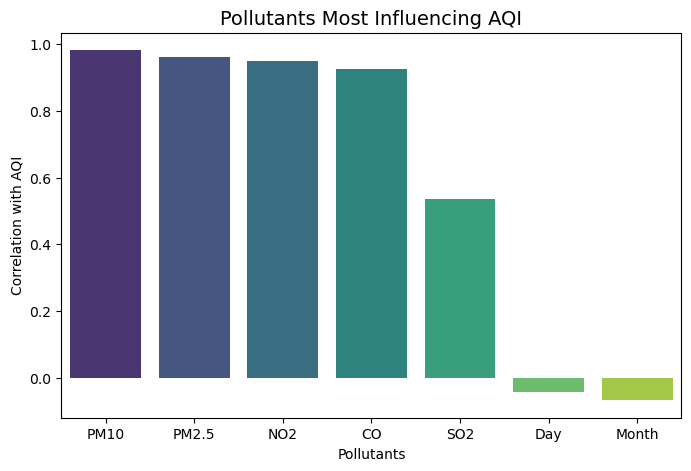

In [29]:
# Correlation of each pollutant with AQI
corr = df.corr(numeric_only=True)["AQI"].drop("AQI").sort_values(ascending=False)

print("Correlation of Pollutants with AQI:\n")
print(corr)

# Plot the ranked correlations
plt.figure(figsize=(8,5))
sns.barplot(x=corr.index, y=corr.values, palette="viridis")
plt.title("Pollutants Most Influencing AQI", fontsize=14)
plt.ylabel("Correlation with AQI")
plt.xlabel("Pollutants")
plt.show()
